# Data Ingestion:

## Loading the Dataset:

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/train(1).csv")

In [3]:
train_data.shape

(10000, 25)

In [4]:
test_data = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/test(1).csv")

In [5]:
test_data.shape

(3203, 24)

# Data Pre-Processing:

## Removing Unecessary Columns

In [257]:
# Removing "ID" column
train_data = train_data.drop("ID",axis=1)

In [258]:
from ydata_profiling import ProfileReport

In [259]:
pf=ProfileReport(train_data)

In [260]:
#pf.to_file(output_file="H:/boiling_liquid_expanding_vapour_explosion/data_report.html")

In [261]:
#pf.to_widgets()

## Checking for Null Values

In [262]:
train_data.isnull().sum()

Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64

In [263]:
train_data.columns.size

24

In [264]:
for col in train_data.columns:
    print(f"Column Name: {col}\n{'='*100}\n{train_data[col].unique()}")

Column Name: Tank Failure Pressure (bar)
[ 7.3 30.6 24.1 27.  36.5 20.2 22.6 21.1 25.  21.   9.9 10.  39.9 29.1
  5.5 19.6 34.9 23.5 31.9  6.6 14.2 15.9 29.6 21.4 25.6 13.9 11.5  6.8
 36.9 31.8 17.9 38.5 29.2 35.3 18.  37.1  7.1 14.4 15.3  9.3  8.6 35.8
 30.2 20.3  7.6  5.6  8.4  7.2 31.6  8.1 37.9 37.4 12.8 12.2 37.2 39.
 33.8 29.  11.9 32.8 30.  18.4 16.8 11.2 23.8  5.9 25.3 24.7 26.8 12.6
 36.8  8.5 25.5 17.6 37.8 26.5 35.7 14.1 15.2 17.2 13.4 23.3 33.2 28.9
  5.3 31.7 15.4 16.7 33.   7.7  9.8 36.  11.   8.3 27.7  9.   7.8 23.4
 40.4  8.8 34.1 24.4 28.  16.1 28.3 30.3 41.9 35.6 11.8 36.4 36.6 17.5
 19.3 38.7 23.1 39.3 10.9 30.9 15.6 29.9  5.4 35.2 32.1 19.7 11.3 16.5
 19.8 22.1 20.6 31.  21.6 35.  24.9 12.5 14.8 15.7 30.4 41.8 22.9 35.5
 14.3 19.5 39.7 16.9 25.1 21.2 34.8 10.3 13.  20.9  5.2  8.9 27.3 12.7
 28.4 34.3  8.7 42.  36.3 29.7 15.8 18.3 37.3 13.8 21.5 33.7 25.8 36.2
  9.7 13.2 10.7 36.1 17.4 26.7 35.9 27.5  6.4 26.2 32.9 33.3 29.4 41.1
 40.9 32.  15.  17.   6.5 39.6 41.6 2

No null/garbage value found!!

In [265]:
train_data[train_data.duplicated()]

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)


## Checking for outliers

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
def box_plot_func(data,col_index_start,col_index_end):
# Creating box plot
    fig ,ax  = plt.subplots(figsize = (25,20))
    sns.boxplot(data = data.iloc[:,col_index_start:col_index_end], ax = ax)

    # Adding labels and title
    plt.xlabel('Data')
    plt.ylabel('Value')
    plt.title('Box Plot')

    # Display the plot
    plt.show()

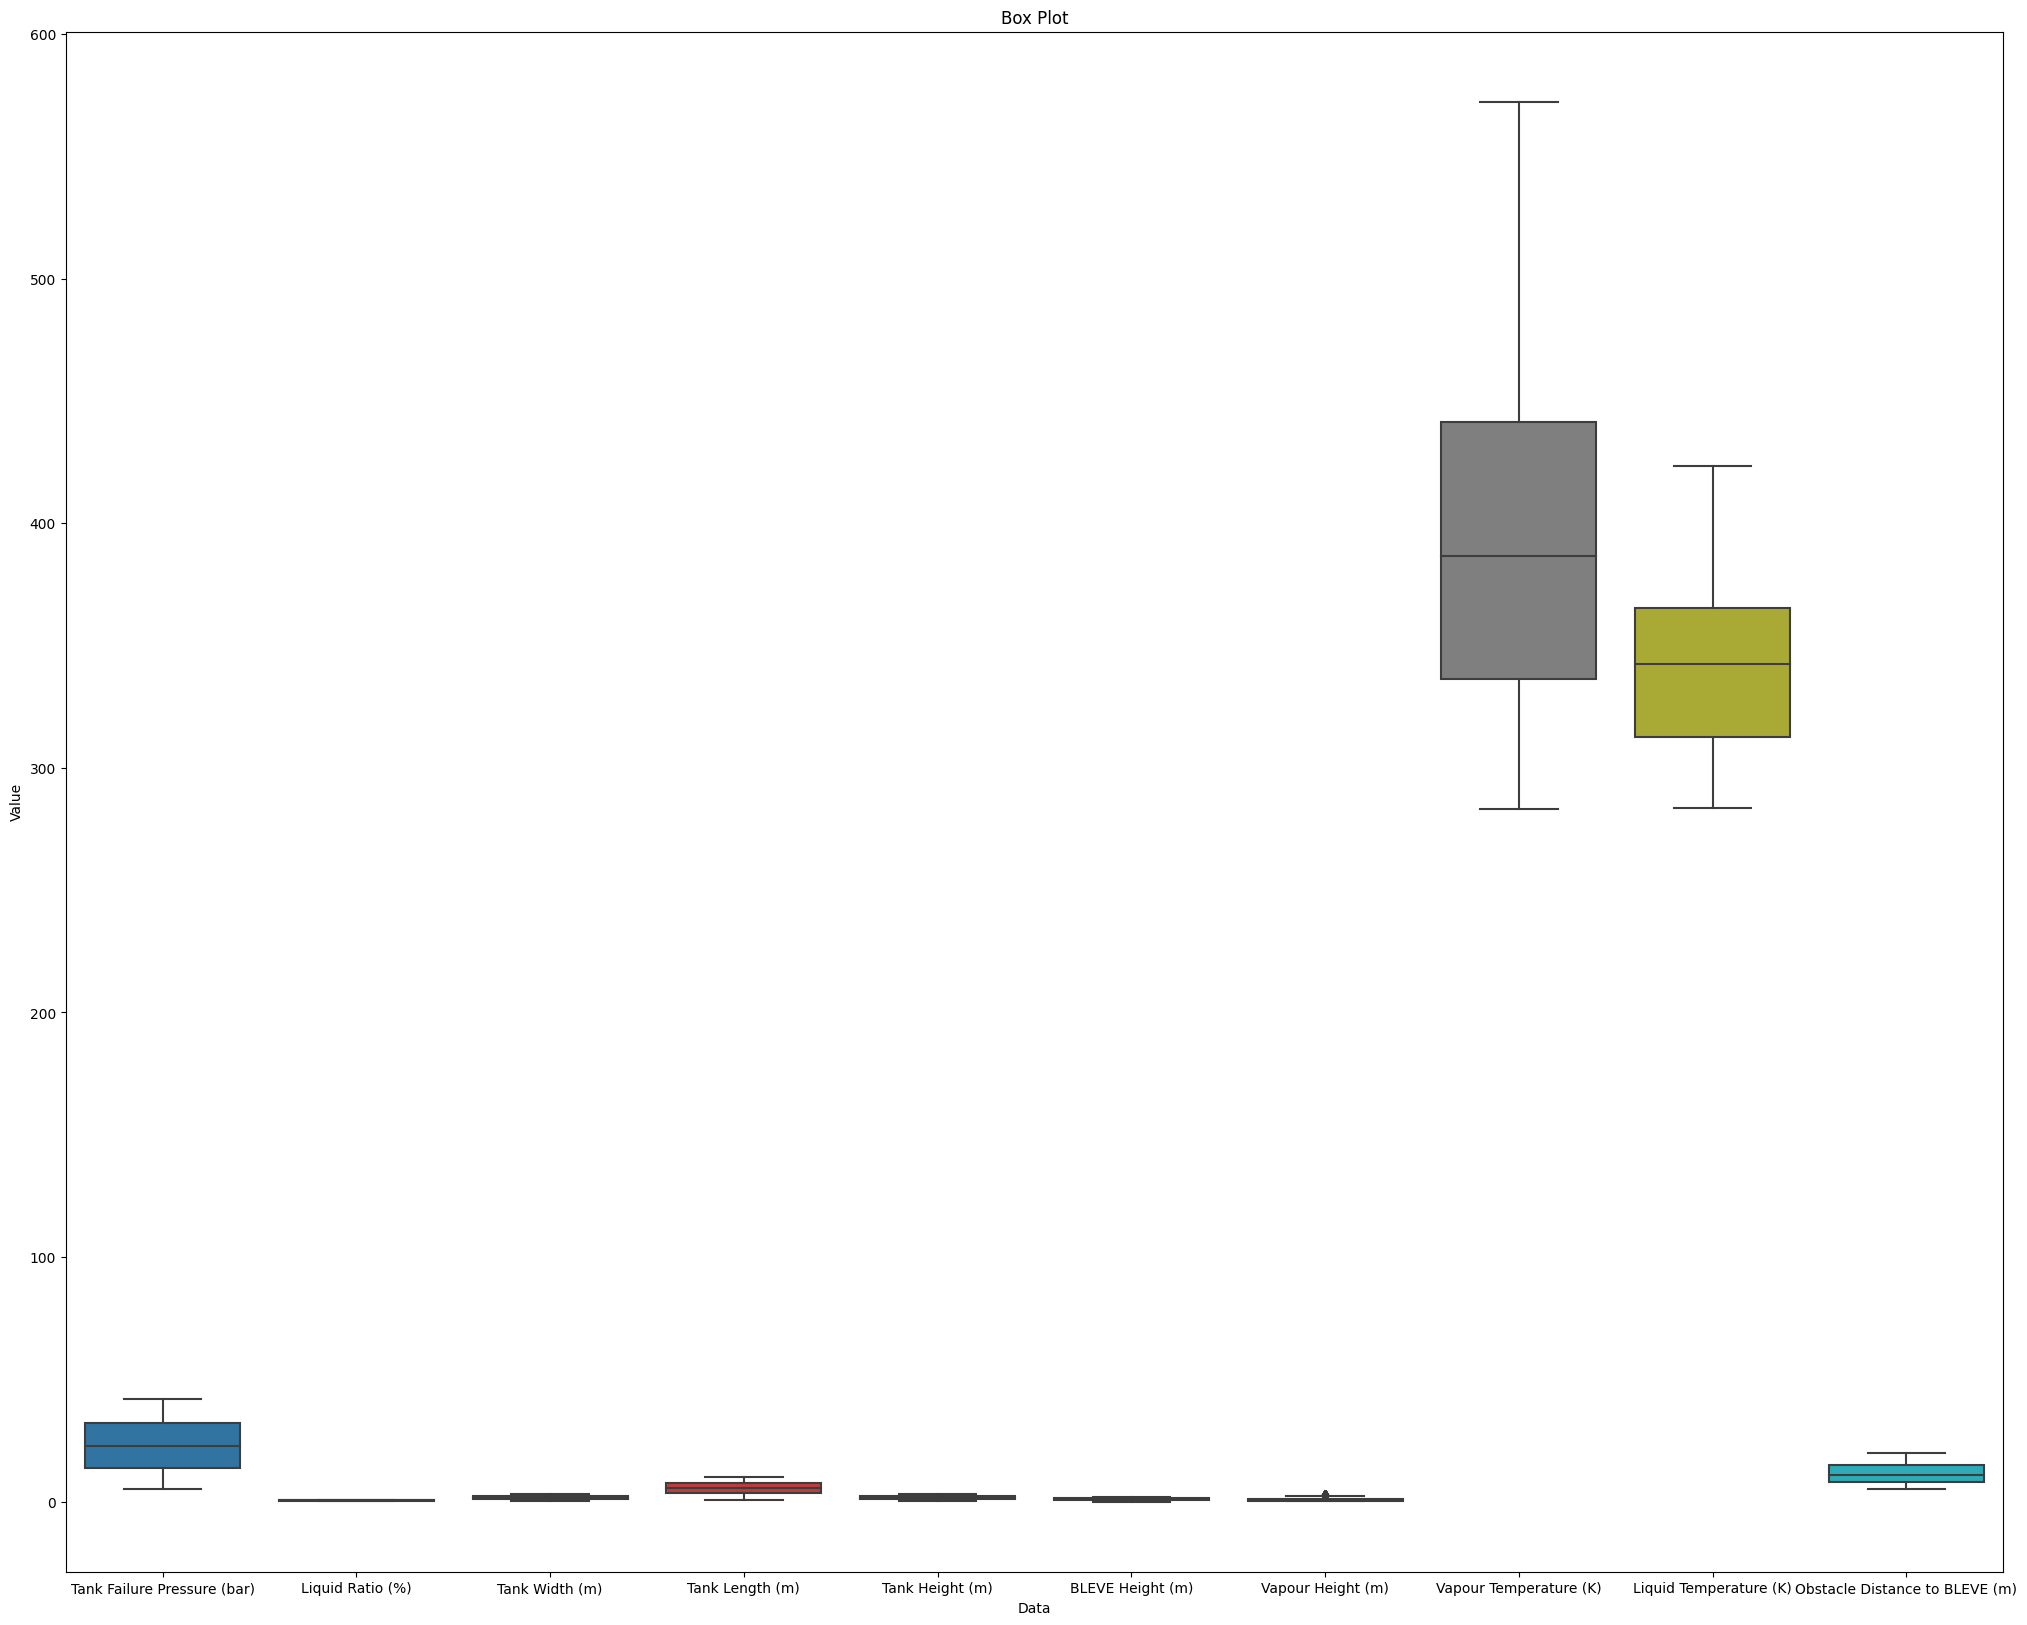

In [267]:
box_plot_func(train_data,0,10)

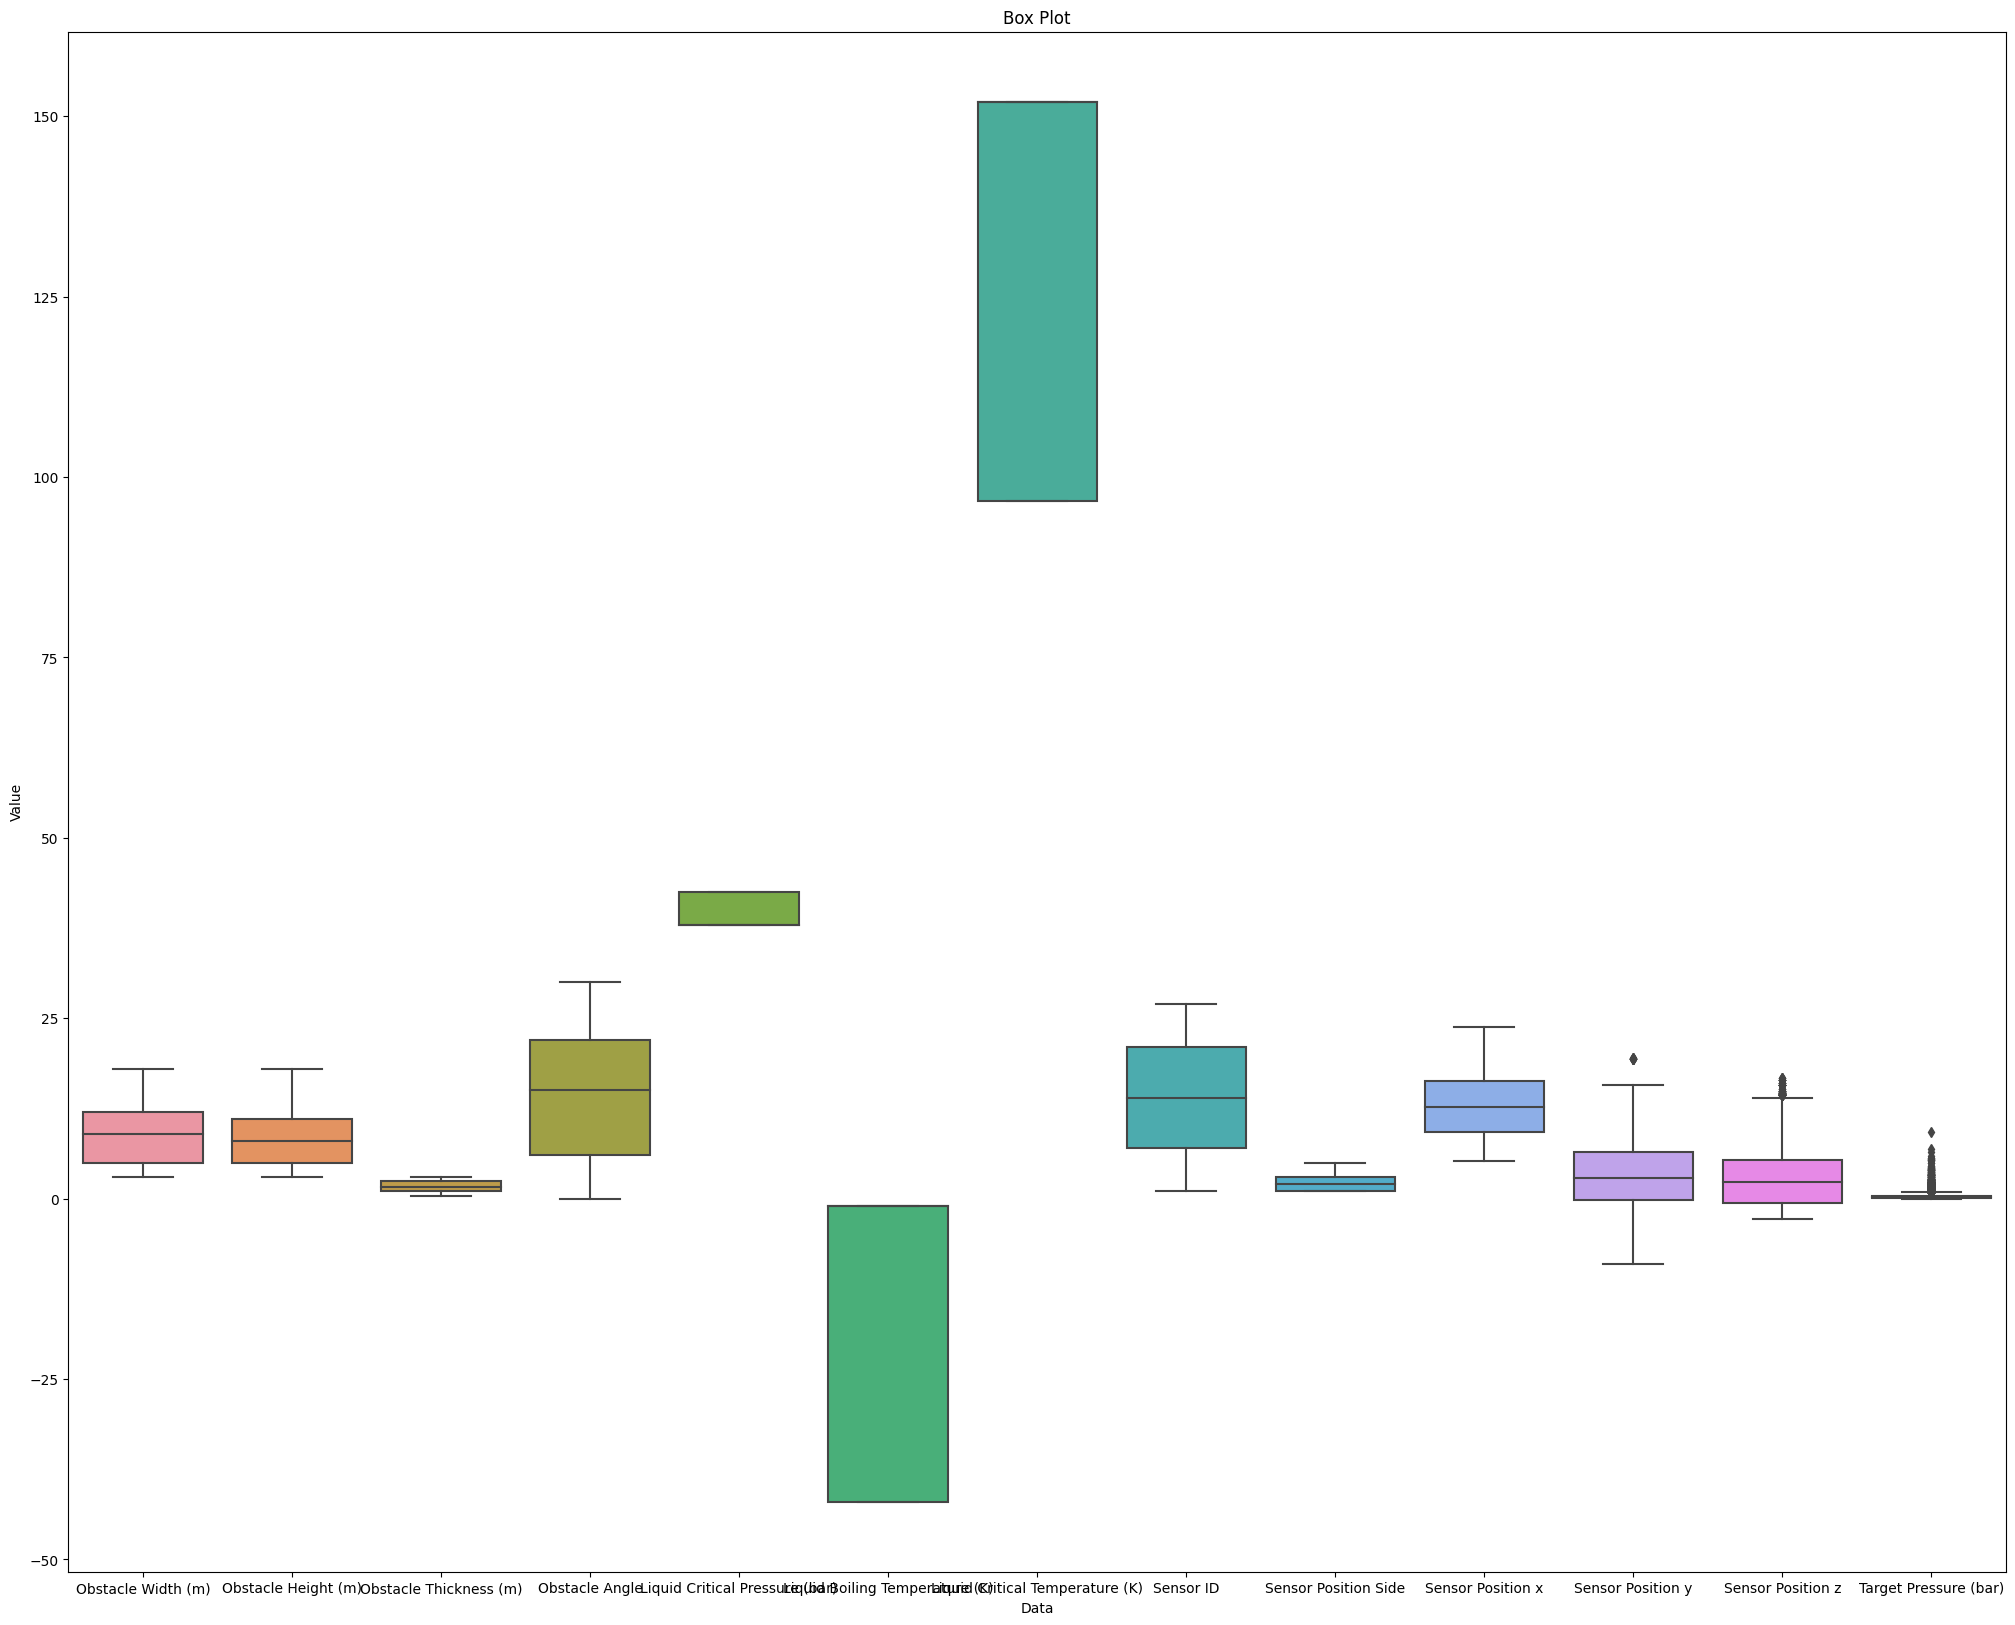

In [268]:
box_plot_func(train_data,10,24)

### Applying IQR Method to remove outliers

In [269]:
import numpy as np

for column in train_data.columns:
    if train_data[column].dtype == "float64":
        Q3,Q1 = np.nanpercentile(train_data[column],[75,25])
        IQR = Q3-Q1
        LF = Q1-1.5*IQR
        HF = Q3+1.5*IQR
        
        train_data[column] = np.where((train_data[column] < LF) | (train_data[column] > HF), np.nan, train_data[column])

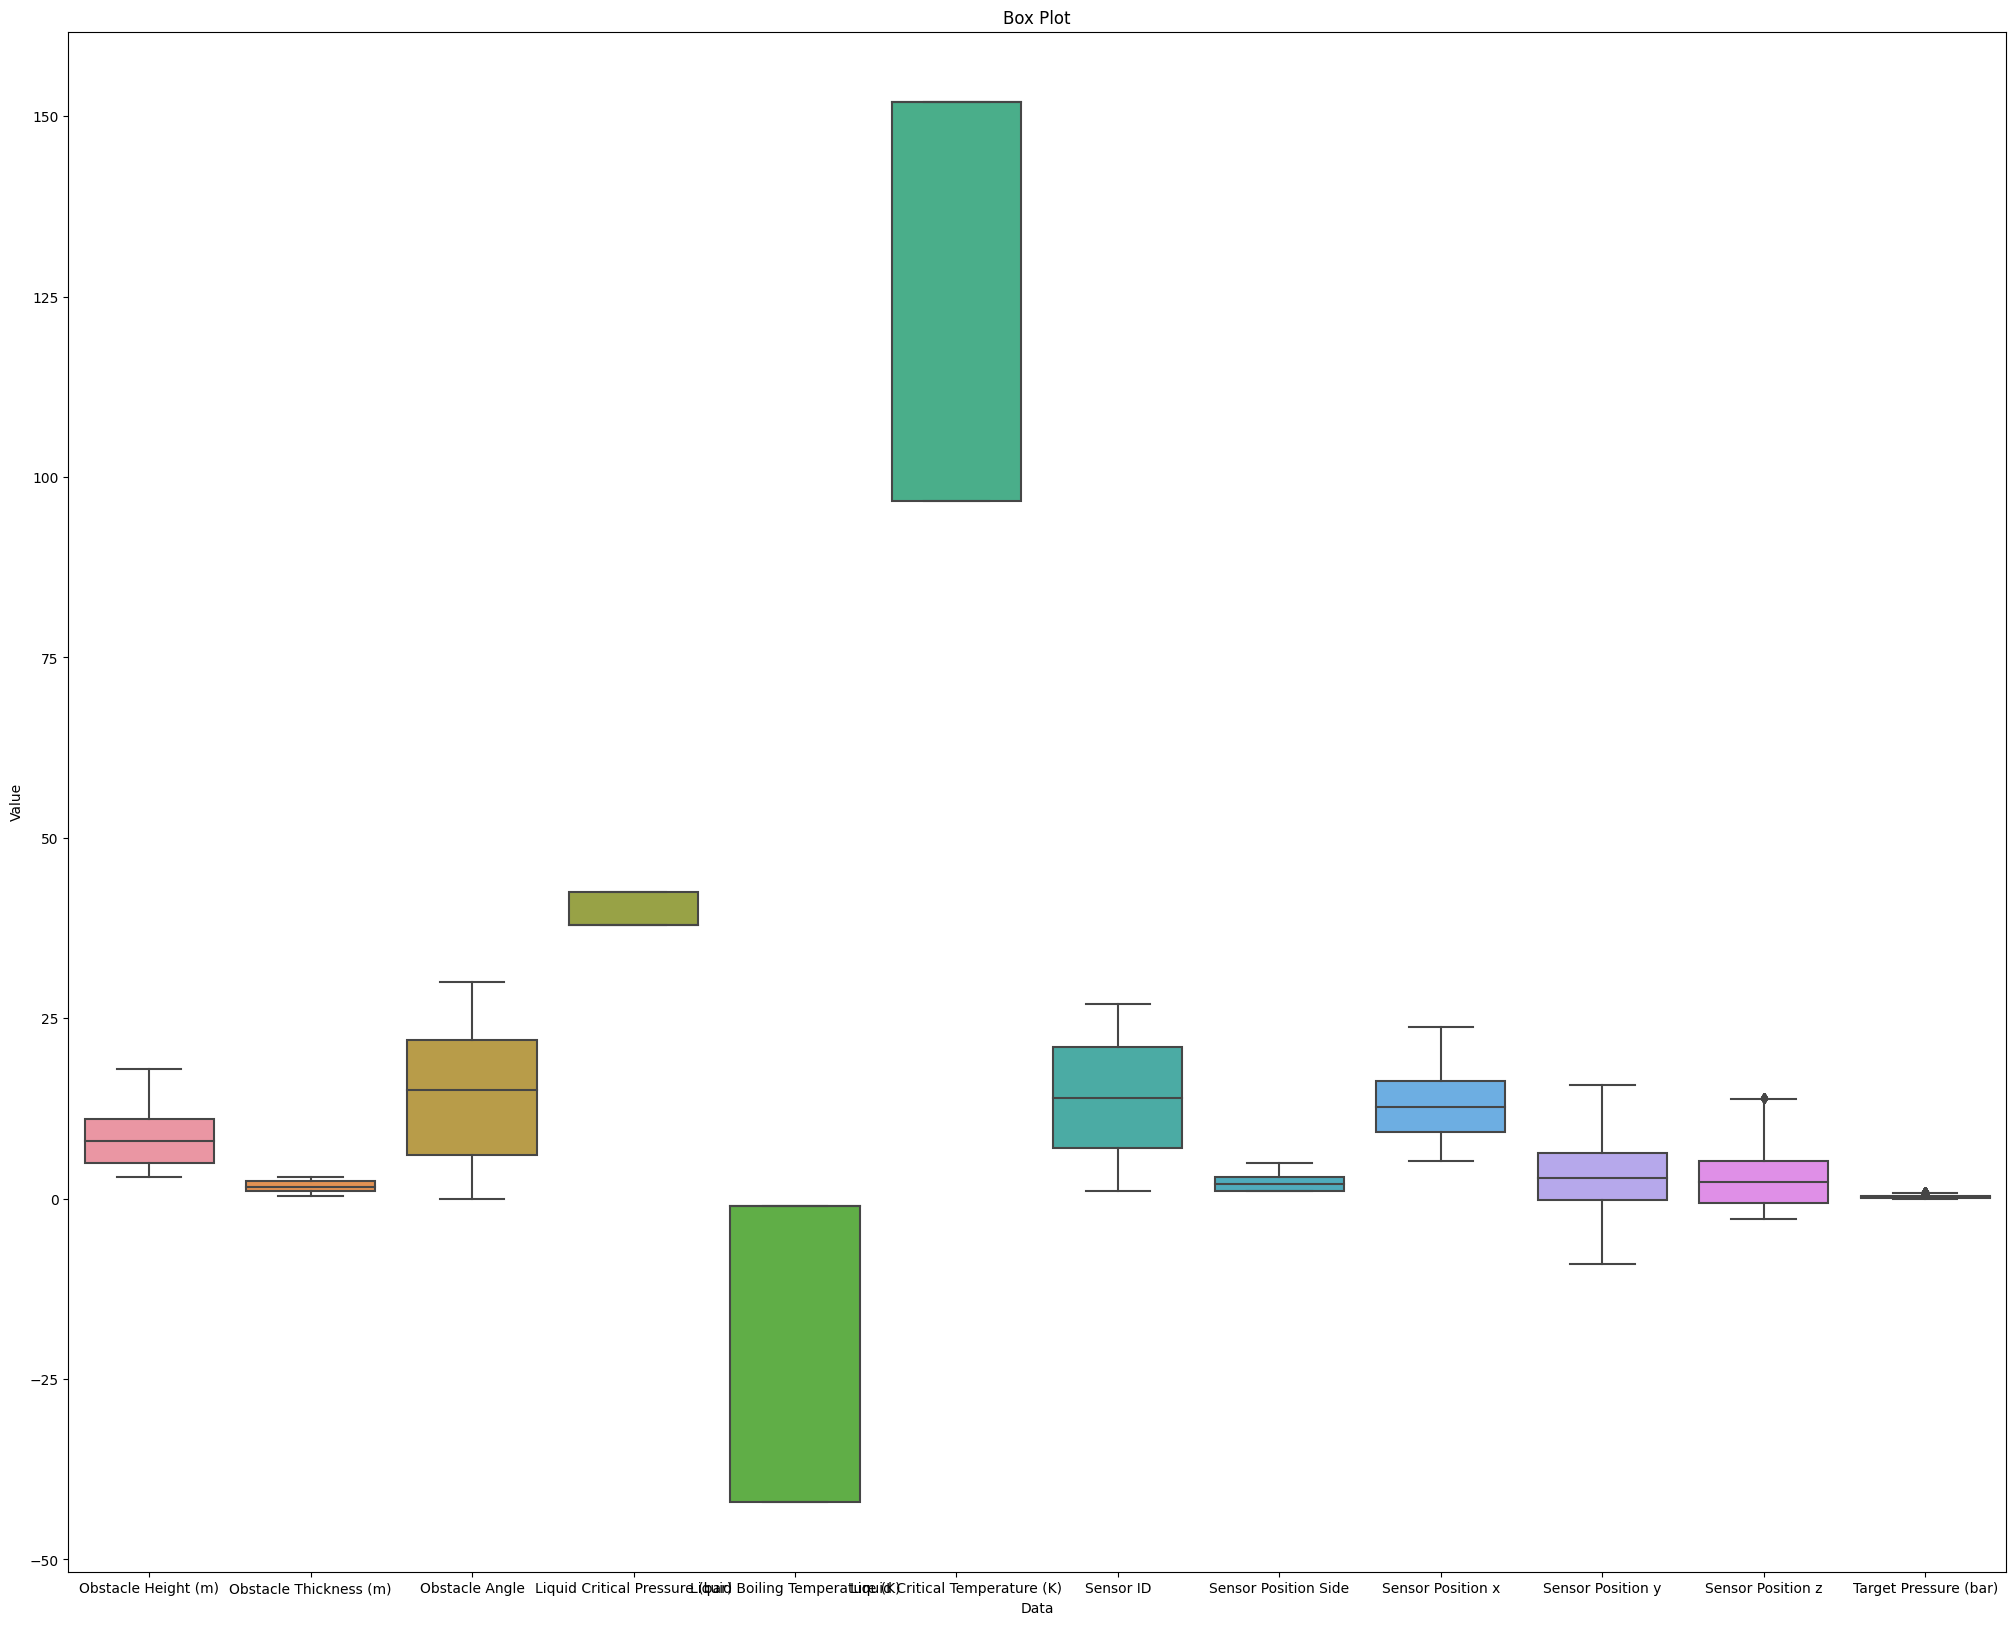

In [270]:
box_plot_func(train_data,11,24)

In [271]:
train_data.isna().sum()

Tank Failure Pressure (bar)          0
Liquid Ratio (%)                     0
Tank Width (m)                       0
Tank Length (m)                      0
Tank Height (m)                      0
BLEVE Height (m)                     0
Vapour Height (m)                   54
Vapour Temperature (K)               0
Liquid Temperature (K)               0
Obstacle Distance to BLEVE (m)       0
Obstacle Width (m)                   0
Obstacle Height (m)                  0
Obstacle Thickness (m)               0
Obstacle Angle                       0
Status                               0
Liquid Critical Pressure (bar)       0
Liquid Boiling Temperature (K)       0
Liquid Critical Temperature (K)      0
Sensor ID                            0
Sensor Position Side                 0
Sensor Position x                    0
Sensor Position y                   10
Sensor Position z                   91
Target Pressure (bar)              882
dtype: int64

We will be removing nan values as they are outliers and most likely to be erros in the recorded readings.

In [272]:
train_data.dropna(inplace=True)

In [273]:
train_data.isna().sum()

Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64

## Summarizing Dataset

In [274]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8987 entries, 0 to 9998
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tank Failure Pressure (bar)      8987 non-null   float64
 1   Liquid Ratio (%)                 8987 non-null   float64
 2   Tank Width (m)                   8987 non-null   float64
 3   Tank Length (m)                  8987 non-null   float64
 4   Tank Height (m)                  8987 non-null   float64
 5   BLEVE Height (m)                 8987 non-null   float64
 6   Vapour Height (m)                8987 non-null   float64
 7   Vapour Temperature (K)           8987 non-null   float64
 8   Liquid Temperature (K)           8987 non-null   float64
 9   Obstacle Distance to BLEVE (m)   8987 non-null   int64  
 10  Obstacle Width (m)               8987 non-null   int64  
 11  Obstacle Height (m)              8987 non-null   int64  
 12  Obstacle Thickness (m)   

## Segregating Numerical And Categorical Columns

In [275]:
categorical_columns = train_data.columns[train_data.dtypes=="object"]
numerical_columns = train_data.columns[train_data.dtypes!="object"]

print(f"Numercial Columns: {numerical_columns}\nCategorical Columns = {categorical_columns}")

Numercial Columns: Index(['Tank Failure Pressure (bar)', 'Liquid Ratio (%)', 'Tank Width (m)',
       'Tank Length (m)', 'Tank Height (m)', 'BLEVE Height (m)',
       'Vapour Height (m)', 'Vapour Temperature (K)', 'Liquid Temperature (K)',
       'Obstacle Distance to BLEVE (m)', 'Obstacle Width (m)',
       'Obstacle Height (m)', 'Obstacle Thickness (m)', 'Obstacle Angle',
       'Liquid Critical Pressure (bar)', 'Liquid Boiling Temperature (K)',
       'Liquid Critical Temperature (K)', 'Sensor ID', 'Sensor Position Side',
       'Sensor Position x', 'Sensor Position y', 'Sensor Position z',
       'Target Pressure (bar)'],
      dtype='object')
Categorical Columns = Index(['Status'], dtype='object')


## Generating Descriptive Stats

In [276]:
train_data[categorical_columns].describe()

,Status
count,8987
unique,2
top,Subcooled
freq,5726


In [277]:
#train_data[numerical_columns].describe().to_csv("H:/boiling_liquid_expanding_vapour_explosion/num_cols_info.csv")

## Analysing Existing Dataset

### Count Plot for Categorical Column

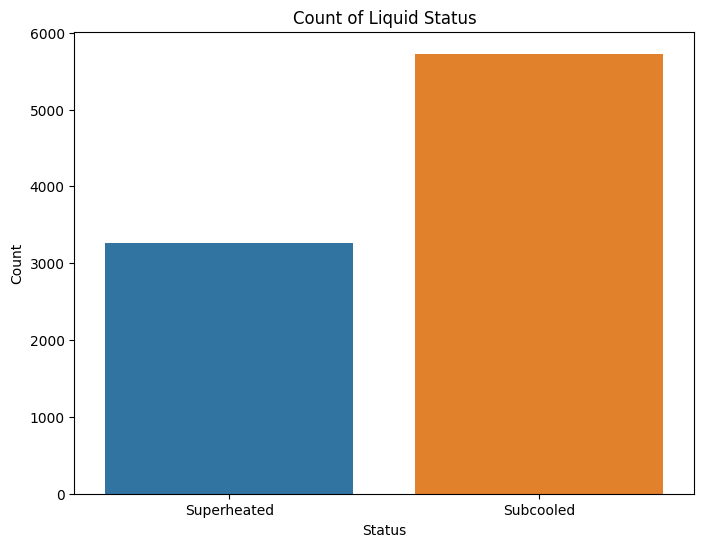

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
# and 'Status' is the column representing the status of the liquid (subcooled or superheated)

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Status')

# Add title and labels
plt.title('Count of Liquid Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Show the plot
plt.show()

### Distribution Plot for Numerical Columns

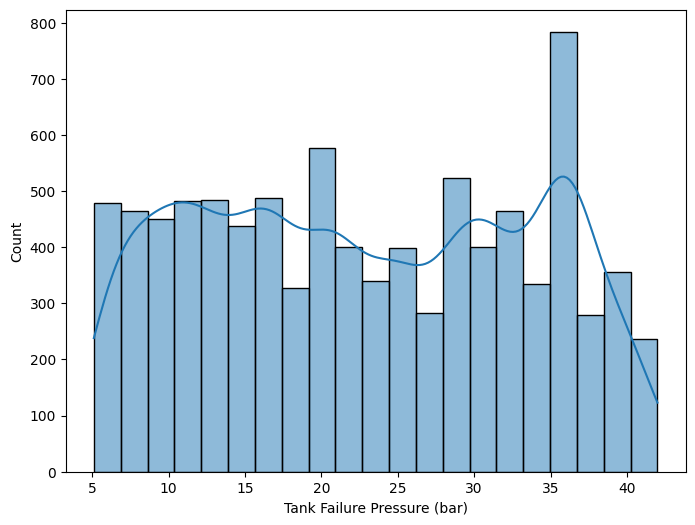

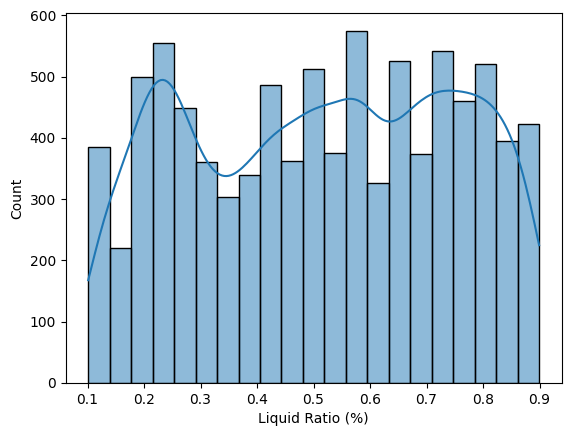

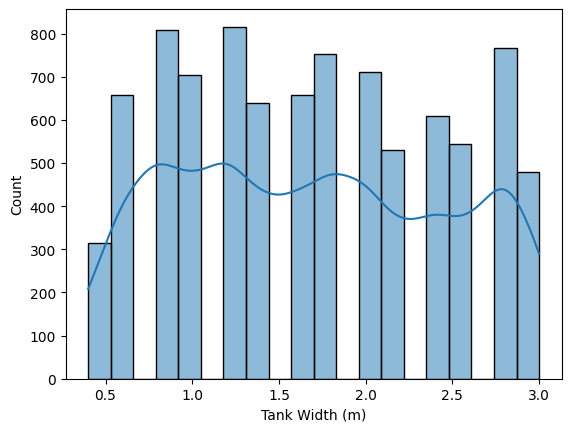

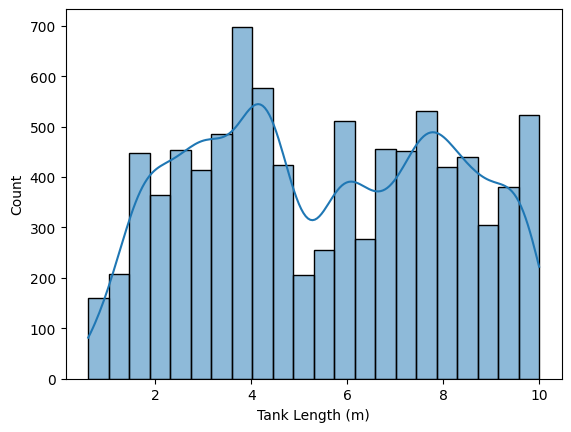

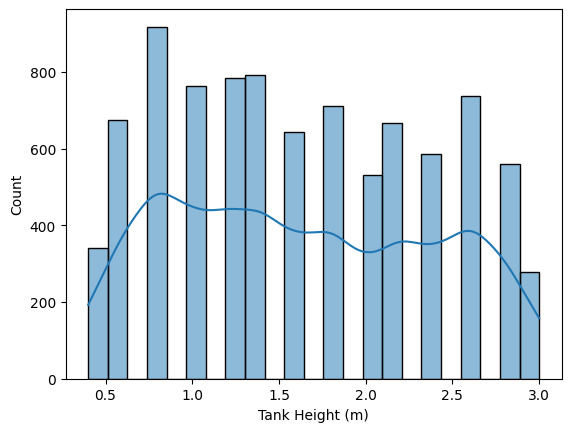

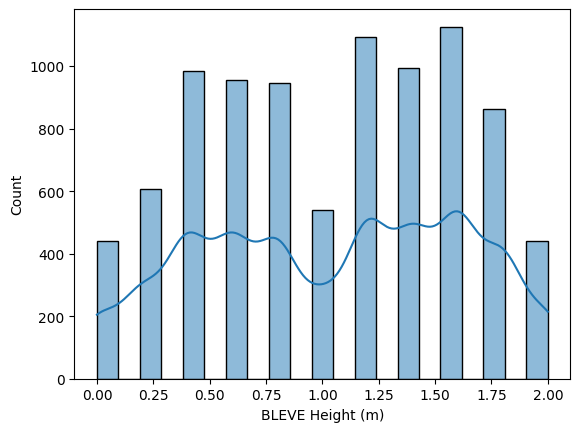

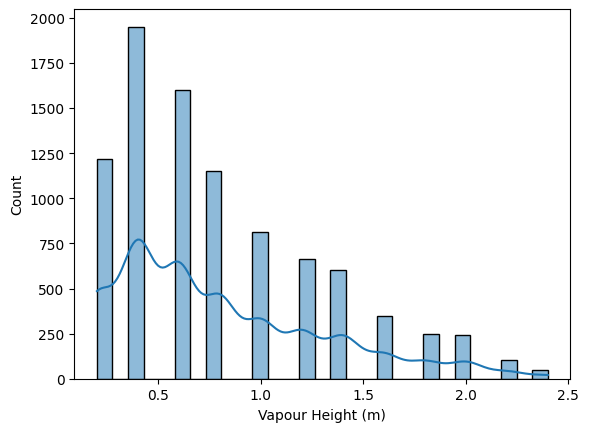

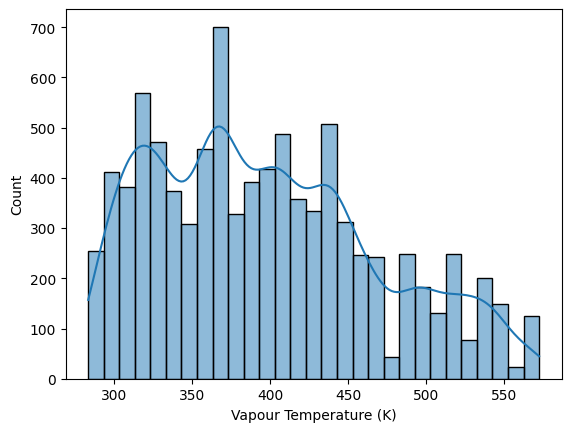

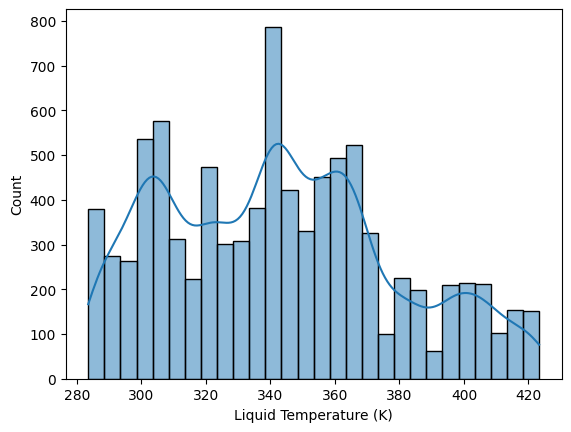

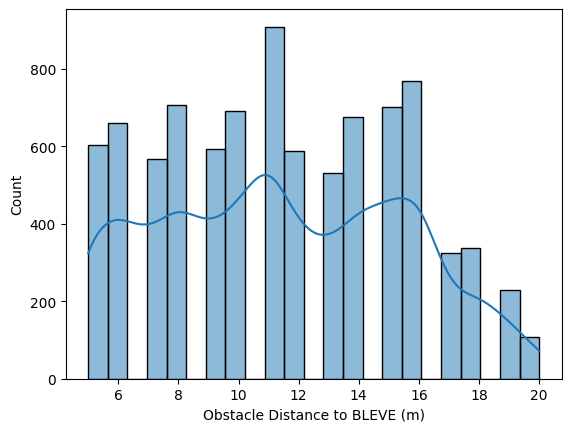

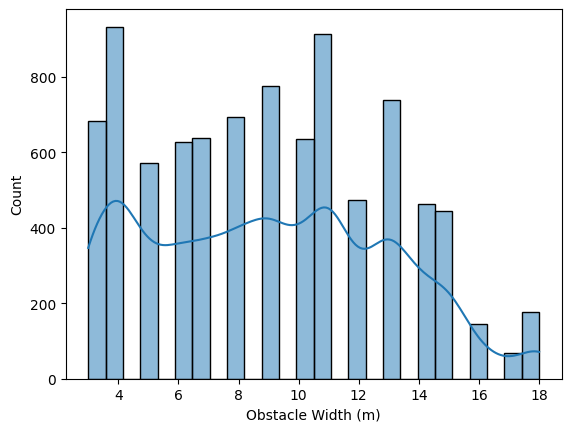

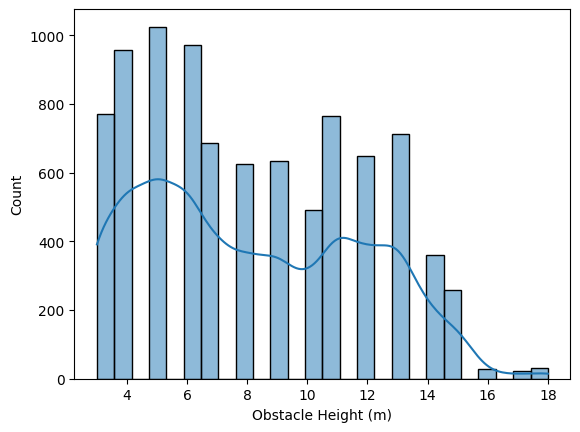

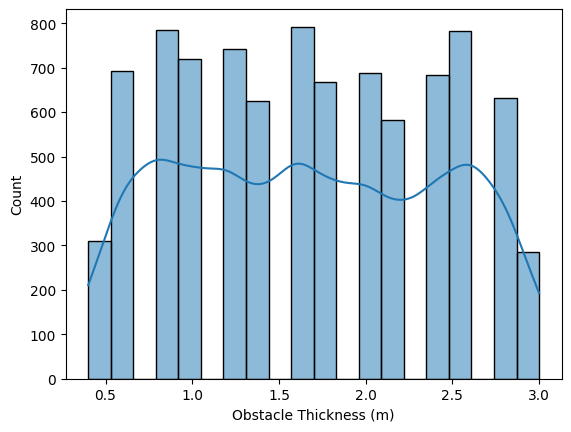

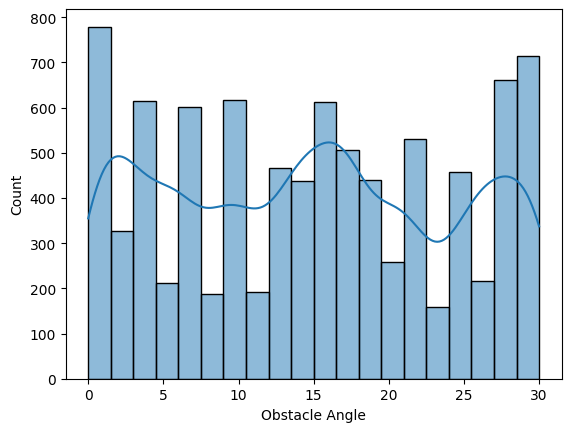

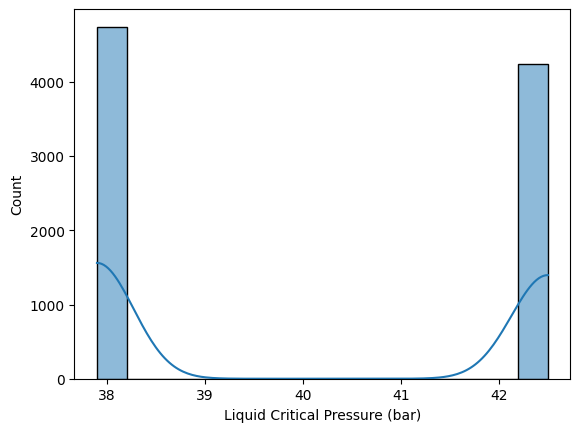

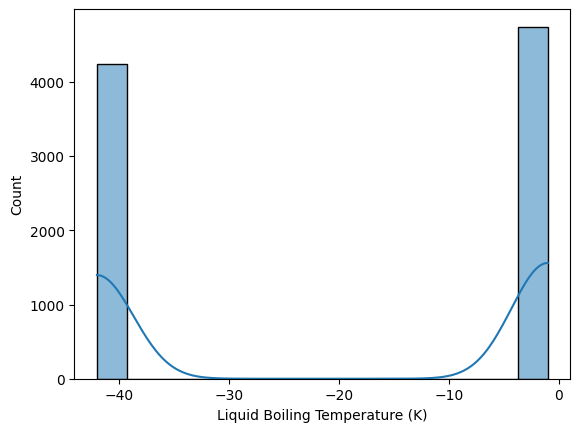

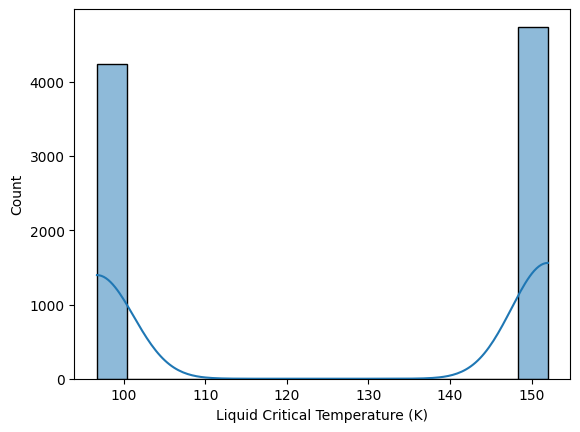

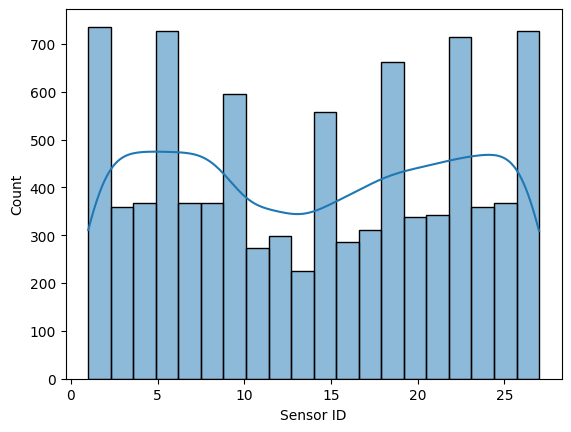

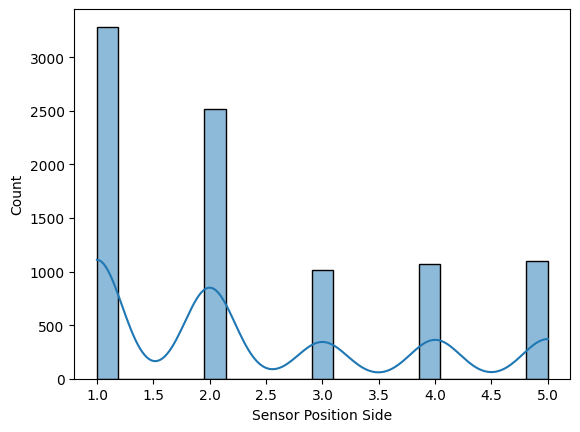

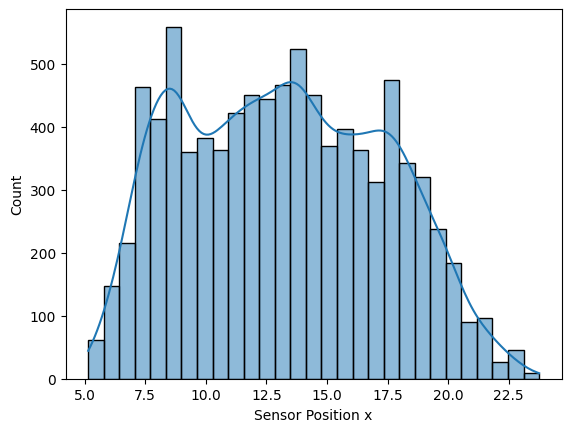

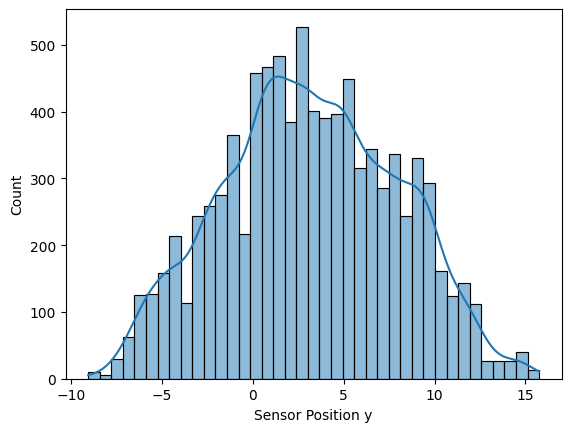

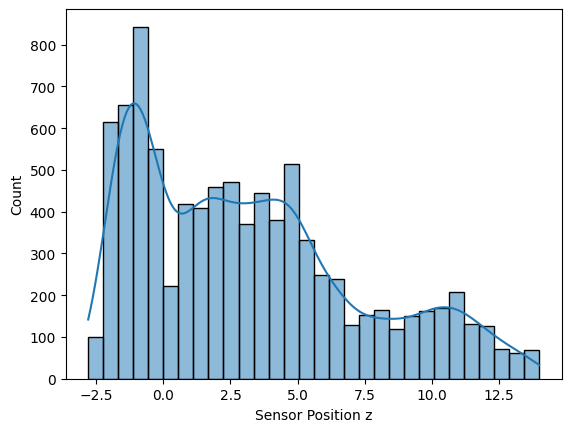

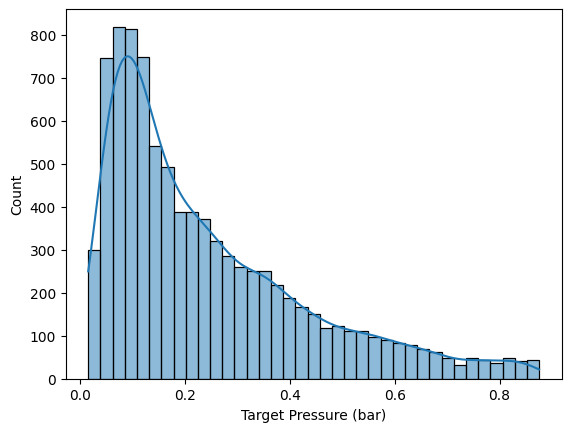

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for i in numerical_columns:
    sns.histplot(data = train_data, x = i, kde = True)
    print("\n")
    plt.show()

We can see that the above features are not normally distributed, hence data normalization will be required before fitting them to regression models.

## Data-Type Conversion:

In [280]:
train_data["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [281]:
# Import label encoder 
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train_data["Status"]= label_encoder.fit_transform(train_data["Status"]) 
  
train_data["Status"].unique() 

array([1, 0])

## Feature Engineering:

In [282]:
train_data_copy = train_data.copy() 

In [283]:
#train_data_copy['Obstacle Volume'] = train_data_copy['Obstacle Width (m)'] * train_data_copy['Obstacle Height (m)'] * train_data_copy['Obstacle Thickness (m)']

In [284]:
#train_data_copy[["Obstacle Volume","Obstacle Width (m)",'Obstacle Height (m)','Obstacle Thickness (m)']].head()

In [285]:
#train_data_copy["Tank Volume"] = train_data_copy["Tank Length (m)"] * train_data_copy['Tank Height (m)'] * train_data_copy['Tank Width (m)']

In [286]:
#train_data_copy[["Tank Volume","Tank Length (m)",'Tank Height (m)','Tank Width (m)']].head()

In [287]:
#train_data_copy.columns

## Feature Selection:

<Axes: >

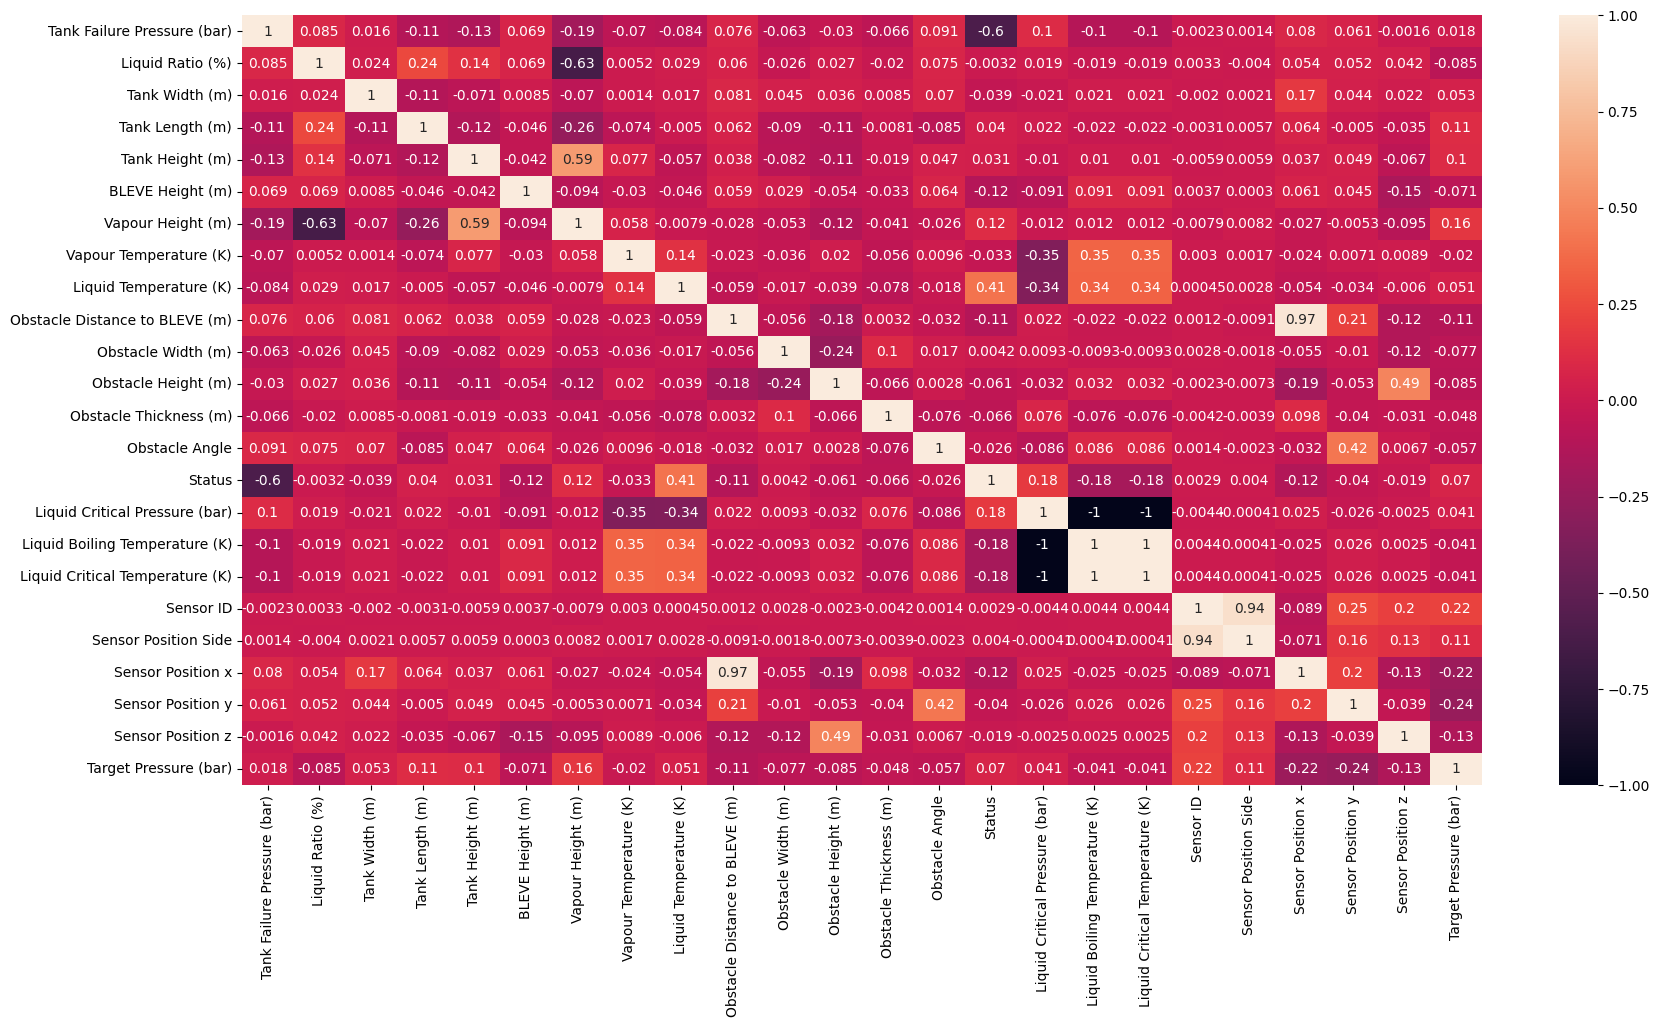

In [288]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data_copy.corr(numeric_only=True),annot=True)

We can see there is correlation between input columns

In [347]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [348]:
correlation(train_data_copy,0.85)

{'Liquid Boiling Temperature (K)',
 'Liquid Critical Temperature (K)',
 'Sensor Position Side',
 'Sensor Position x'}

In [349]:
train_data_copy.drop(columns=['Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)','Sensor Position Side','Sensor Position x','Sensor Position y','Sensor Position z'],inplace=True)

In [289]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(train_data_copy, i) for i in range(train_data_copy.shape[1])]

columns = train_data_copy.columns.tolist()

# Create a new DataFrame 'vif_df' with 'feature' and 'VIF' columns
vif_df = pd.DataFrame({'feature': columns, 'VIF': vif_values})

h:\boiling_liquid_expanding_vapour_explosion\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [290]:
vif_df

,feature,VIF
0,Tank Failure Pressure (bar),2.402850
1,Liquid Ratio (%),5.545060
2,Tank Width (m),1.594580
3,Tank Length (m),1.394294
4,Tank Height (m),5.122463
5,BLEVE Height (m),1.088626
6,Vapour Height (m),8.353089
7,Vapour Temperature (K),1.165015
8,Liquid Temperature (K),1.852882
9,Obstacle Distance to BLEVE (m),42.291282


We can see that ```Sensor Position x``` and ```Obstacle Distance to BLEVE (m)``` are greater than 10 which means they are multi-collinear.

In [291]:
x_train = train_data_copy.drop(columns="Target Pressure (bar)")

In [292]:
x_train.head()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,13,1,37.9,-1,152.0,18,2,12.15,7.90,10.7
1,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,13,1,37.9,-1,152.0,19,3,12.50,-2.95,-1.9
2,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,13,1,37.9,-1,152.0,20,3,12.50,-2.95,4.4
3,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,13,1,37.9,-1,152.0,21,3,12.50,-2.95,10.7
4,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,13,1,37.9,-1,152.0,22,4,12.50,-2.70,11.0


In [293]:
y_train = train_data[["Target Pressure (bar)"]]

In [294]:
y_train.head()

,Target Pressure (bar)
0,0.199929
1,0.435681
2,0.264031
3,0.270576
4,0.204675


## Standardization:

In [295]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [296]:
arr = scaler.fit_transform(x_train)

In [297]:
x_train_scaled = pd.DataFrame(arr)

In [298]:
x_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.496273,-0.253661,-0.259051,0.993472,1.822357
1,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.619781,0.466154,-0.173780,-1.279752,-1.232224
2,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.743289,0.466154,-0.173780,-1.279752,0.295067
3,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.866798,0.466154,-0.173780,-1.279752,1.822357
4,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.990306,1.185968,-0.173780,-1.227373,1.895085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,-0.424411,0.240551,0.403386,0.662224,-0.845324,-1.457945,-0.787153,2.005039,-0.669623,0.628271,...,-1.259304,-0.754657,-0.945935,0.945935,0.945935,0.372765,-0.253661,0.423121,0.721104,0.949620
8983,-0.424411,0.240551,0.403386,0.662224,-0.845324,-1.457945,-0.787153,2.005039,-0.669623,0.628271,...,-1.259304,-0.754657,-0.945935,0.945935,0.945935,0.619781,0.466154,0.703299,-1.761633,-0.820098
8984,-0.424411,0.240551,0.403386,0.662224,-0.845324,-1.457945,-0.787153,2.005039,-0.669623,0.628271,...,-1.259304,-0.754657,-0.945935,0.945935,0.945935,0.743289,0.466154,0.703299,-1.761633,0.949620
8985,-0.424411,0.240551,0.403386,0.662224,-0.845324,-1.457945,-0.787153,2.005039,-0.669623,0.628271,...,-1.259304,-0.754657,-0.945935,0.945935,0.945935,1.360831,1.905783,0.703299,0.773482,-0.820098


In [299]:
x_train_scaled.columns = x_train.columns

In [300]:
x_train_scaled.head()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.496273,-0.253661,-0.259051,0.993472,1.822357
1,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.619781,0.466154,-0.173780,-1.279752,-1.232224
2,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.743289,0.466154,-0.173780,-1.279752,0.295067
3,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.866798,0.466154,-0.173780,-1.279752,1.822357
4,-1.468438,-0.429764,0.925565,-0.029845,-0.845324,1.328794,-0.393621,1.758747,0.327539,-0.117472,...,-0.182311,1.325105,-0.945935,0.945935,0.945935,0.990306,1.185968,-0.173780,-1.227373,1.895085


In [301]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [302]:
x_train.to_csv("H:/boiling_liquid_expanding_vapour_explosion/x_train.csv")
y_train.to_csv("H:/boiling_liquid_expanding_vapour_explosion/y_train.csv")

In [304]:
lr.predict([[7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,18,2,12.15,7.9,10.7]])

h:\boiling_liquid_expanding_vapour_explosion\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.92094708e+13]])

In [305]:
test1 = scaler.transform([[7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,11,13,0.6,13,1,37.9,-1,152.0,18,2,12.15,7.9,10.7]])

h:\boiling_liquid_expanding_vapour_explosion\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [306]:
lr.predict(test1)

h:\boiling_liquid_expanding_vapour_explosion\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.19133282]])

In [307]:
train_data_copy.head()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,1,37.9,-1,152.0,18,2,12.15,7.90,10.7,0.199929
1,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,1,37.9,-1,152.0,19,3,12.50,-2.95,-1.9,0.435681
2,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,1,37.9,-1,152.0,20,3,12.50,-2.95,4.4,0.264031
3,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,1,37.9,-1,152.0,21,3,12.50,-2.95,10.7,0.270576
4,7.3,0.4158,2.4,5.4,1.0,1.8,0.6,522.8,354.3,11,...,1,37.9,-1,152.0,22,4,12.50,-2.70,11.0,0.204675


As we can see our actual result for the same values was 0.199929 after scaling we are getting a prediction of 0.1913 so model is are getting some patterns.

# Test Data

In [308]:
x_test = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion/test(1).csv").drop(columns="ID")

In [309]:
#x_test['Obstacle Volume'] = x_test['Obstacle Width (m)'] * x_test['Obstacle Height (m)'] * x_test['Obstacle Thickness (m)']

In [310]:
#x_test["Tank Volume"] = x_test["Tank Length (m)"] * x_test['Tank Height (m)'] * x_test['Tank Width (m)']

## Data-Type Conversion

In [311]:
x_test["Status"]= label_encoder.fit_transform(x_test["Status"]) 
  
x_test["Status"].unique()

array([1, 0])

In [312]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tank Failure Pressure (bar)      3203 non-null   float64
 1   Liquid Ratio (%)                 3203 non-null   float64
 2   Tank Width (m)                   3203 non-null   float64
 3   Tank Length (m)                  3203 non-null   float64
 4   Tank Height (m)                  3203 non-null   float64
 5   BLEVE Height (m)                 3203 non-null   float64
 6   Vapour Height (m)                3203 non-null   float64
 7   Vapour Temperature (K)           3203 non-null   float64
 8   Liquid Temperature (K)           3203 non-null   float64
 9   Obstacle Distance to BLEVE (m)   3203 non-null   int64  
 10  Obstacle Width (m)               3203 non-null   int64  
 11  Obstacle Height (m)              3203 non-null   int64  
 12  Obstacle Thickness (

In [313]:
arr_test = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(arr_test)

In [314]:
x_test_scaled.columns = x_test.columns

In [315]:
x_test_scaled["Status"]

0       1.325105
1       1.325105
2       1.325105
3       1.325105
4       1.325105
          ...   
3198    1.325105
3199    1.325105
3200    1.325105
3201    1.325105
3202    1.325105
Name: Status, Length: 3203, dtype: float64

In [316]:
y_test = pd.read_csv("H:/boiling_liquid_expanding_vapour_explosion\sample_prediction(1).csv").drop(columns="ID")

In [323]:
y_pred = lr.predict(x_test_scaled)

In [324]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-1.063078693915672
0.3384318400556785


## Model Evaluation

In [320]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [321]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Train Multiple Models

In [322]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_scaled,y_train)

    # Make Predictions
    y_pred = model.predict(x_test_scaled)

    mae, rmse, r2_square = evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Training Performance")
    print("RMSE: ",rmse)
    print("MAE: ",mae)
    print("R2 Score: ",r2_square*100)
    r2_list.append(r2_square)
    print("="*100)

LinearRegression
Model Training Performance
RMSE:  0.4140066425834407
MAE:  0.3384318400556785
R2 Score:  -106.3078693915672
Lasso
Model Training Performance
RMSE:  0.3833195564797305
MAE:  0.3143338097845258
R2 Score:  -76.8573565398045
Ridge
Model Training Performance
RMSE:  0.4138935032498611
MAE:  0.3383348245962562
R2 Score:  -106.19512557019495
ElasticNet
Model Training Performance
RMSE:  0.3833195564797305
MAE:  0.3143338097845258
R2 Score:  -76.8573565398045


In [325]:
from sklearn.svm import SVR
svr=SVR()

In [326]:
svr.fit(x_train_scaled,y_train)

h:\boiling_liquid_expanding_vapour_explosion\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [327]:
y_pred=svr.predict(x_test_scaled)

In [328]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-1.286123647986313
0.3582767587433519
